In [6]:
df = pd.read_excel('Project_Shopping_Trend.xlsx')
df.head()


,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmountUSD,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyOfPurchases
0,1,56,Male,Bag,Accessories,374.86,New York,L,Red,Fall,3,No,Standard,Yes,No,7,PayPal,Fortnightly
1,2,46,Male,Shoes,Home Decor,33.28,Los Angeles,S,Black,Spring,2,No,Express,Yes,No,3,UPI,Weekly
2,3,32,Female,Laptop,Home Decor,117.45,Houston,S,Black,Fall,4,No,Standard,Yes,Yes,13,UPI,Monthly
3,4,60,Male,Bag,Home Decor,356.05,Chicago,M,Green,Summer,2,Yes,Express,No,No,14,PayPal,Weekly
4,5,25,Female,Laptop,Accessories,393.50,Houston,M,Black,Winter,2,Yes,Express,No,No,5,Cash,Fortnightly


In [5]:
import pandas as pd
df = pd.read_excel('Project_Shopping_Trend.xlsx')
df.head()

,CustomerID,Age,Gender,ItemPurchased,Category,PurchaseAmountUSD,Location,Size,Color,Season,ReviewRating,SubscriptionStatus,ShippingType,DiscountApplied,PromoCodeUsed,PreviousPurchases,PaymentMethod,FrequencyOfPurchases
0,1,56,Male,Bag,Accessories,374.86,New York,L,Red,Fall,3,No,Standard,Yes,No,7,PayPal,Fortnightly
1,2,46,Male,Shoes,Home Decor,33.28,Los Angeles,S,Black,Spring,2,No,Express,Yes,No,3,UPI,Weekly
2,3,32,Female,Laptop,Home Decor,117.45,Houston,S,Black,Fall,4,No,Standard,Yes,Yes,13,UPI,Monthly
3,4,60,Male,Bag,Home Decor,356.05,Chicago,M,Green,Summer,2,Yes,Express,No,No,14,PayPal,Weekly
4,5,25,Female,Laptop,Accessories,393.50,Houston,M,Black,Winter,2,Yes,Express,No,No,5,Cash,Fortnightly


In [7]:
df.isnull().sum()


,0
CustomerID,0
Age,0
Gender,0
ItemPurchased,0
Category,0
PurchaseAmountUSD,0
Location,0
Size,0
Color,0
Season,0


In [8]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['Gender', 'Category', 'Season', 'Location',
            'SubscriptionStatus', 'PaymentMethod', 'FrequencyOfPurchases']

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [9]:
category_analysis = df.groupby('Category').agg({
    'PurchaseAmountUSD': 'mean',
    'ReviewRating': 'mean',
    'DiscountApplied': lambda x: (x == 'Yes').mean()
}).reset_index()

category_analysis


,Category,PurchaseAmountUSD,ReviewRating,DiscountApplied
0,0,253.735366,3.009756,0.507317
1,1,262.280188,3.037688,0.474874
2,2,250.884093,3.059585,0.468912
3,3,259.210303,2.982895,0.498684
4,4,251.141516,3.077128,0.481383


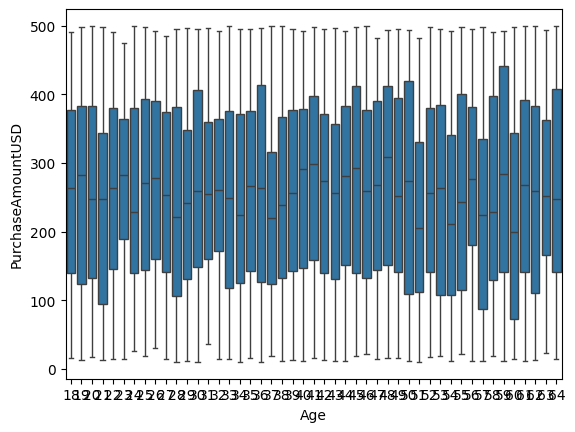

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Age', y='PurchaseAmountUSD', data=df)
plt.show()


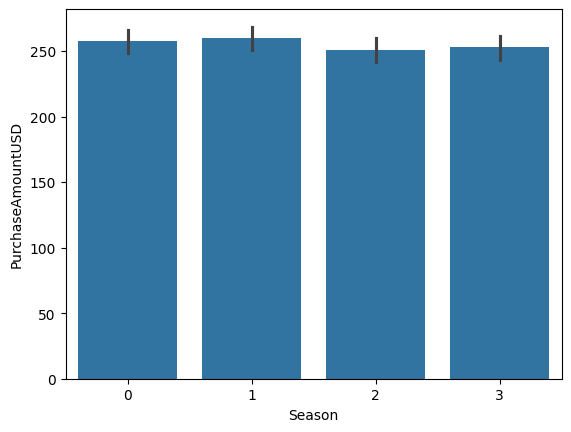

In [11]:
sns.barplot(x='Season', y='PurchaseAmountUSD', data=df)
plt.show()


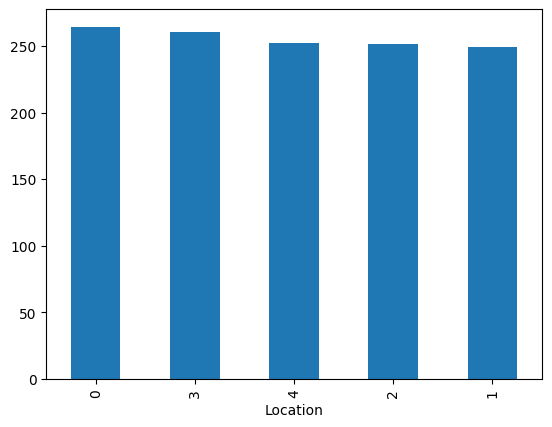

In [12]:
top_locations = df.groupby('Location')['PurchaseAmountUSD'].mean().sort_values(ascending=False).head(10)
top_locations.plot(kind='bar')
plt.show()


In [13]:
features = df[['Age', 'PurchaseAmountUSD',
               'ReviewRating', 'PreviousPurchases',
               'FrequencyOfPurchases']]


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


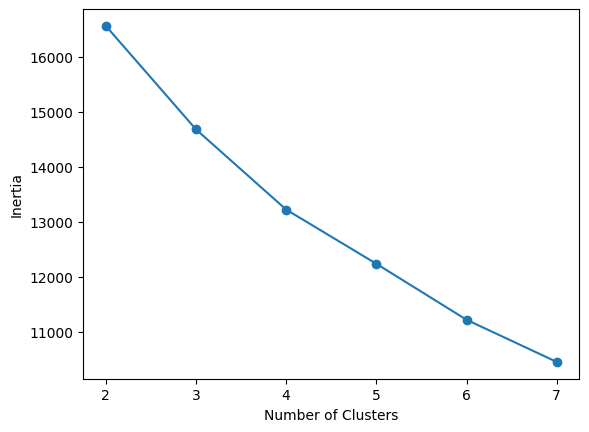

In [15]:
from sklearn.cluster import KMeans

inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_features)
    inertia.append(km.inertia_)

plt.plot(range(2, 8), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

In [17]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
cluster_summary

,CustomerID,Age,Gender,Category,PurchaseAmountUSD,Location,Season,ReviewRating,SubscriptionStatus,PreviousPurchases,PaymentMethod,FrequencyOfPurchases
Cluster,,,,,,,,,,,,
0,1930.903545,35.835120,0.505359,1.932399,346.183718,1.946414,1.490519,2.957131,0.492993,7.037923,1.998351,1.712284
1,1988.314976,41.578912,0.503694,1.969778,107.971343,2.045668,1.486904,2.955675,0.490262,6.775688,2.068502,1.013432
2,1923.341402,46.156928,0.500835,1.962437,346.985492,2.036728,1.434057,3.206177,0.503339,7.031720,1.989149,0.291319


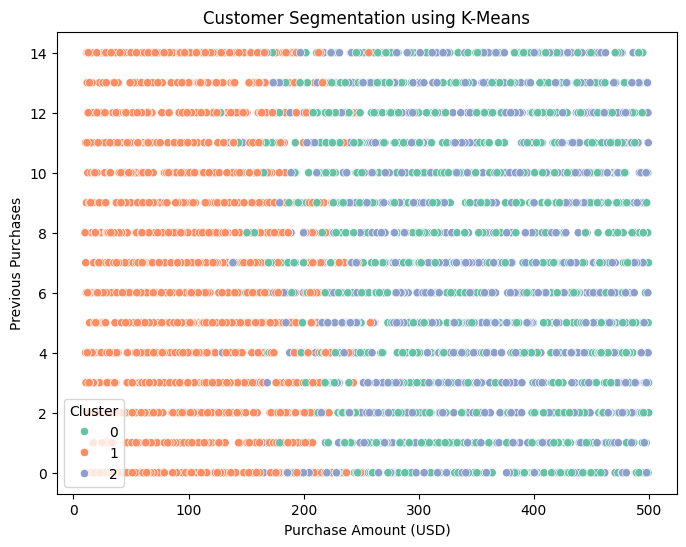

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=df['PurchaseAmountUSD'],
    y=df['PreviousPurchases'],
    hue=df['Cluster'],
    palette='Set2'
)
plt.title("Customer Segmentation using K-Means")
plt.xlabel("Purchase Amount (USD)")
plt.ylabel("Previous Purchases")
plt.legend(title="Cluster")
plt.show()

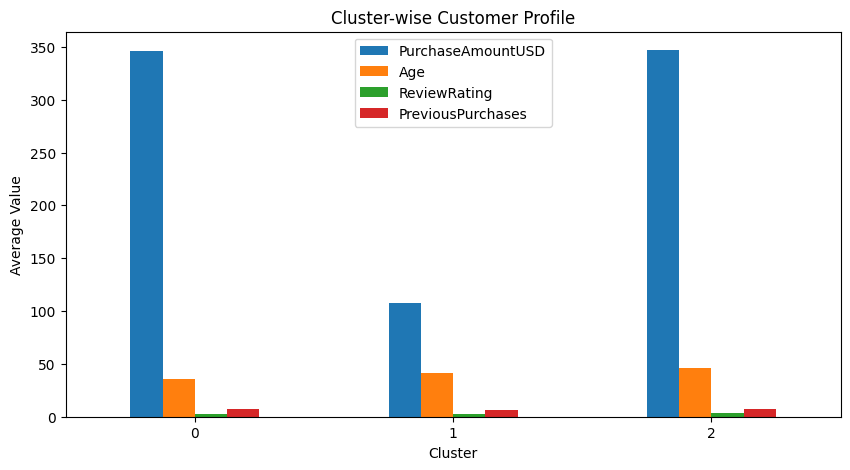

In [19]:
cluster_profile = df.groupby('Cluster')[[
    'PurchaseAmountUSD',
    'Age',
    'ReviewRating',
    'PreviousPurchases'
]].mean()

cluster_profile.plot(kind='bar', figsize=(10,5))
plt.title("Cluster-wise Customer Profile")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()